In [206]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [227]:
BTC = yf.download('BTC-USD', start = '2022-1-04', end = '2022-10-04')['Adj Close']
ETH = yf.download('ETH-USD', start = '2022-1-04', end = '2022-10-04')['Adj Close']
BNB = yf.download('BNB-USD', start = '2022-1-04', end = '2022-10-04')['Adj Close']
USDT = yf.download('USDT-USD', start = '2022-1-04', end = '2022-10-04')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [228]:
print(BTC, ETH, BNB, TSLA)

Date
2022-01-04    45897.574219
2022-01-05    43569.003906
2022-01-06    43160.929688
2022-01-07    41557.902344
2022-01-08    41733.941406
                  ...     
2022-09-29    19573.050781
2022-09-30    19431.789062
2022-10-01    19312.095703
2022-10-02    19044.107422
2022-10-03    19623.580078
Name: Adj Close, Length: 273, dtype: float64 Date
2022-01-04    3794.056641
2022-01-05    3550.386963
2022-01-06    3418.408203
2022-01-07    3193.210449
2022-01-08    3091.972656
                 ...     
2022-09-29    1335.652344
2022-09-30    1327.978638
2022-10-01    1311.644409
2022-10-02    1276.093506
2022-10-03    1323.439209
Name: Adj Close, Length: 273, dtype: float64 Date
2022-01-04    507.506104
2022-01-05    475.056946
2022-01-06    473.275604
2022-01-07    447.788483
2022-01-08    430.246155
                 ...    
2022-09-29    283.789032
2022-09-30    284.192291
2022-10-01    282.871918
2022-10-02    284.433105
2022-10-03    287.031982
Name: Adj Close, Length: 273, dtype: 

In [229]:
stocks = pd.concat([BTC, ETH, BNB, TSLA], axis=1)
stocks.columns = ['BTC', 'ETH', 'BNB', 'TSLA'] 
stocks

,BTC,ETH,BNB,TSLA
Date,,,,
2022-01-04,45897.574219,3794.056641,507.506104,383.196655
2022-01-05,43569.003906,3550.386963,475.056946,362.706665
2022-01-06,43160.929688,3418.408203,473.275604,354.899994
2022-01-07,41557.902344,3193.210449,447.788483,342.320007
2022-01-08,41733.941406,3091.972656,430.246155,NaN
...,...,...,...,...
2022-09-29,19573.050781,1335.652344,283.789032,268.209991
2022-09-30,19431.789062,1327.978638,284.192291,265.250000
2022-10-01,19312.095703,1311.644409,282.871918,NaN


In [230]:
#RETURNS

returns = stocks.shift(1)/stocks
returns

,BTC,ETH,BNB,TSLA
Date,,,,
2022-01-04,NaN,NaN,NaN,NaN
2022-01-05,1.053446,1.068632,1.068306,1.056492
2022-01-06,1.009455,1.038608,1.003764,1.021997
2022-01-07,1.038573,1.070524,1.056918,1.036749
2022-01-08,0.995782,1.032742,1.040773,NaN
...,...,...,...,...
2022-09-29,0.992524,1.001317,0.992925,1.073077
2022-09-30,1.007270,1.005778,0.998581,1.011159
2022-10-01,1.006198,1.012453,1.004668,NaN


In [231]:
#LOGARITMIC RETURNS

logReturns = np.log(returns)*250
logReturns

,BTC,ETH,BNB,TSLA
Date,,,,
2022-01-04,NaN,NaN,NaN,NaN
2022-01-05,13.016572,16.594800,16.518514,13.738474
2022-01-06,2.352574,9.470399,0.939198,5.439595
2022-01-07,9.461997,17.037046,13.839227,9.022512
2022-01-08,-1.056762,8.054383,9.990872,NaN
...,...,...,...,...
2022-09-29,-1.876046,0.328938,-1.775041,17.632577
2022-09-30,1.810831,1.440464,-0.354993,2.774362
2022-10-01,1.544679,3.094085,1.164221,NaN


In [232]:
a = 10000

ret_arr = np.zeros(a)
vol_arr = np.zeros(a)
sr_arr = np.zeros(a)
wt_arr = np.zeros((a,len(stocks.columns)))

In [233]:
wt_arr.shape

(10000, 4)

In [234]:
weight = np.zeros((a, 4))
expectedReturn = np.zeros(a)
expectedVolatility = np.zeros(a)
sharpeRatio = np.zeros(a)

meanlogReturns = logReturns.mean()
Sigma = logReturns.cov()
for k in range(a):
    w = np.array(np.random.random(4))
    w = w / np.sum(w)
    weight[k,:] = w
    
    expectedReturn[k] = np.sum(meanlogReturns * w)
    expectedVolatility[k] = np.sqrt(np.dot(w.T, np.dot(Sigma,w)))
    
    sharpeRatio[k] = expectedReturn[k] / expectedVolatility[k]

In [235]:
print(w)

[0.0681838  0.02519601 0.22300531 0.68361488]


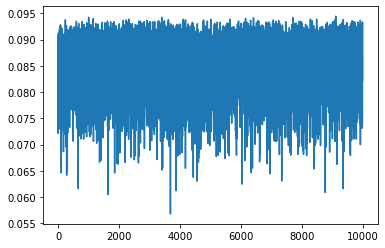

In [236]:
plt.plot(sharpeRatio)

In [237]:
maxIndex = sharpeRatio.argmax()
weight[maxIndex,:]

array([0.60701747, 0.03130261, 0.00163729, 0.36004263])

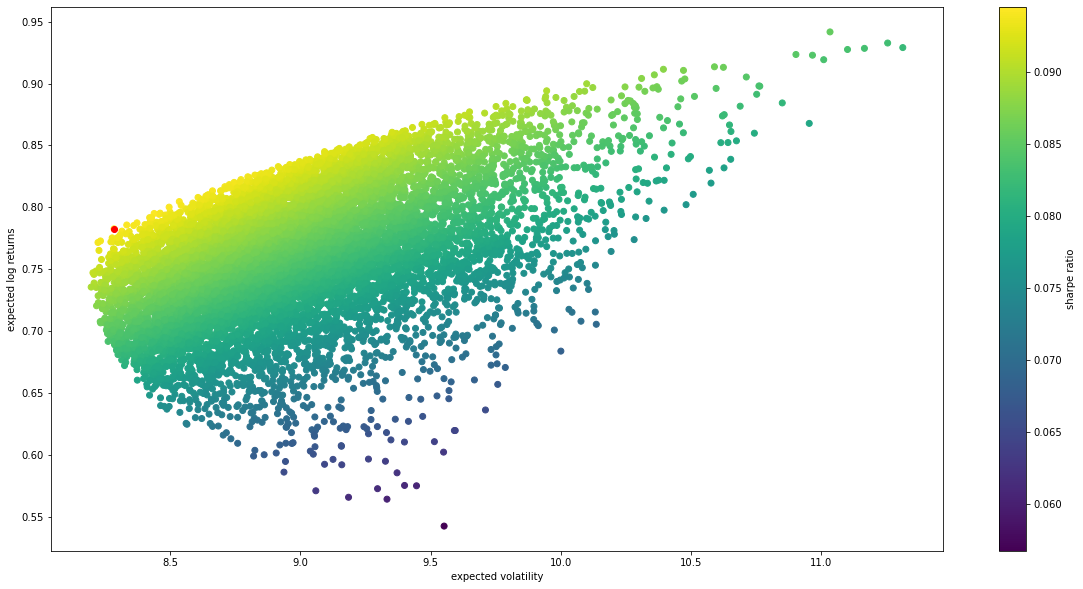

In [238]:
plt.figure(figsize=(20,10))
plt.scatter(expectedVolatility,expectedReturn,c=sharpeRatio)
plt.xlabel('expected volatility')
plt.ylabel('expected log returns')
plt.colorbar(label='sharpe ratio')
plt.scatter(expectedVolatility[maxIndex],expectedReturn[maxIndex],c='red')
plt.show()

In [239]:
def negativeSR(w):
    w = np.array(w)
    R = np.sum(meanlogReturns*w)
    V = np.sqrt(np.dot(w.T, np.dot(Sigma,w)))
    SR = R/V
    return -1*SR

def b(w):
    return np.sum(w)-1

w0 = [0.25, 0.25, 0.25, 0.25] 
bounds = ((0,1), (0,1), (0,1), (0,1))
constraints = ({'type': 'eq', 'fun': b})
w_opt = minimize(negativeSR, w0, method='SLSQP', bounds=bounds, constraints=constraints)
w_opt

     fun: -0.09451541231376327
     jac: array([-1.06105581e-05,  5.26979566e-05,  2.62692757e-02,  9.71369445e-06])
 message: 'Optimization terminated successfully'
    nfev: 60
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([0.58992774, 0.05293949, 0.        , 0.35713278])

In [240]:
print(w)

[0.0681838  0.02519601 0.22300531 0.68361488]


In [241]:
w_opt.x

array([0.58992774, 0.05293949, 0.        , 0.35713278])

In [242]:
returns = np.linspace(0, 1.50, num= 50, endpoint=True, retstep=False, dtype=None, axis=0)
volatility_opt = []

def GR(w):
    w = np.array(w)
    R = np.sum(meanlogReturns*w)
    return R

def minimizeMyvolatility(w):
    w =np.array(w)
    V = np.sqrt(np.dot(w.T, np.dot(Sigma, w)))
    return V

for R in returns:
    constraints = ({'type': 'eq', 'fun': b},
                   {'type': 'eq', 'fun': lambda w: GR(w) - R})
    opt = minimize(minimizeMyvolatility, w0, method = 'SLSQP', bounds = bounds, constraints = constraints)

    volatility_opt.append(opt['fun'])

In [243]:
volatility_opt

[9.717803061622684,
 9.717803061626181,
 9.717803061627581,
 9.717803061658744,
 9.717803061641648,
 9.717803061632583,
 9.71780306166188,
 9.717803061626416,
 9.71780306162267,
 9.717803061628198,
 9.717803061621101,
 9.717803061665705,
 9.717803061642403,
 9.71780306167262,
 9.717803061622941,
 9.717803061628425,
 9.717803061639096,
 9.717803061620897,
 9.25798139117463,
 8.86704443463618,
 8.621602339179422,
 8.44613660468652,
 8.315329189171875,
 8.23130942617915,
 8.19551643154021,
 8.208581098757522,
 8.424949191162506,
 8.81601062754914,
 9.281995751768694,
 9.812235943774013,
 10.41626913712545,
 11.196928206187666,
 11.765976918708859,
 11.765976918712793,
 11.76597691870855,
 11.765976918709118,
 11.765976918711813,
 11.765976918718332,
 11.765976918722208,
 11.7659769187368,
 11.765976918734319,
 11.765976918719193,
 11.765976918764071,
 11.765976918727873,
 11.76597691871085,
 11.765976918816301,
 11.765976918830646,
 11.765976918761291,
 11.765976918724366,
 11.76597691873

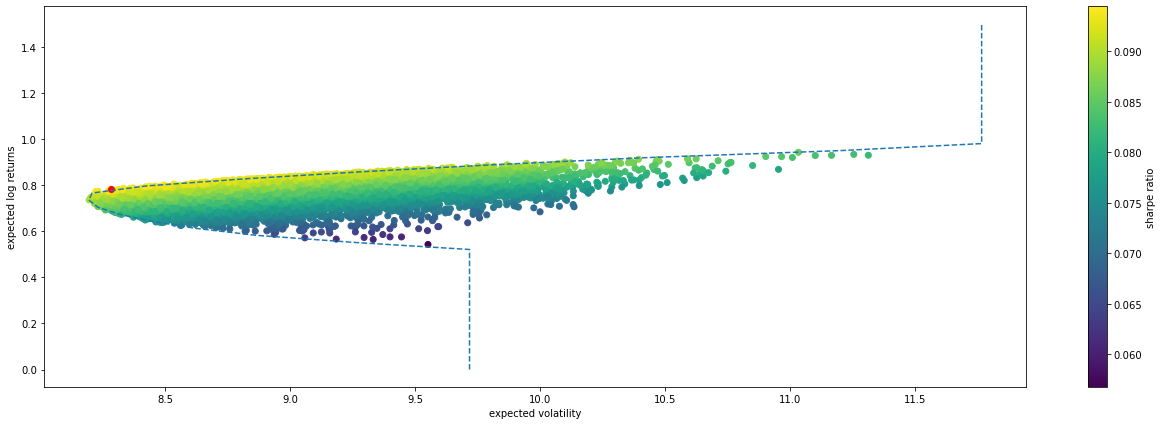

In [244]:
plt.figure(figsize=(22,7))
plt.scatter(expectedVolatility,expectedReturn,c=sharpeRatio)
plt.xlabel('expected volatility')
plt.ylabel('expected log returns')
plt.colorbar(label='sharpe ratio')
plt.scatter(expectedVolatility[maxIndex],expectedReturn[maxIndex],c='red')
plt.plot(volatility_opt,returns, '--')
plt.show()